In [1]:
#import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
import os
import pickle
import seaborn as sns
import datetime as dt
from model import StockEnv,get_scaler, play_one_episode, LinearModel, DQNAgent
from tqdm.notebook import tqdm
import pyfolio as pf
%matplotlib inline

C:\Users\User\anaconda3\envs\MyDjango\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


Stock name: JCI
Start: 2013-02-19 00:00:00, End: 2020-12-31 00:00:00
Training data: 1227 
Tsesting data: 756 


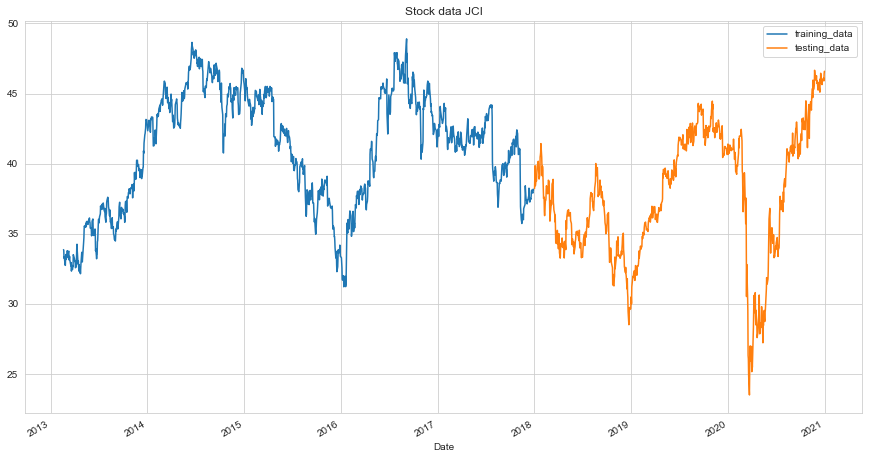

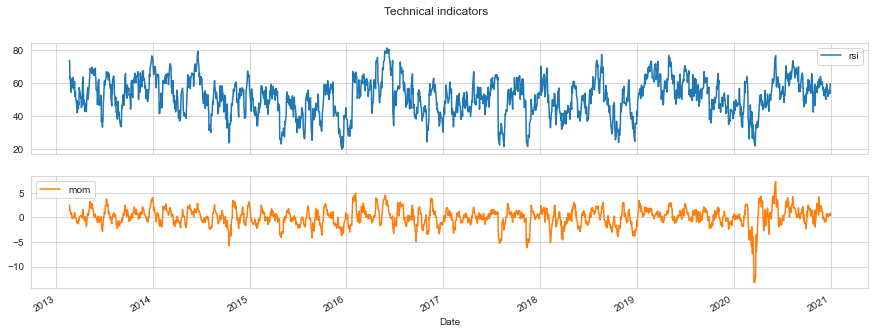

In [2]:
stock_name = 'jci'.upper()
industry = 'Industrial'
stock_data = pd.read_csv(f'../train_test_data/{stock_name}.csv', index_col=['Date'], parse_dates=True)

train_data = stock_data.loc[:'2018-01-01']
test_data = stock_data.loc['2018-01-01':]

print(f'Stock name: {stock_name}')
print(f'Start: {stock_data.index[0]}, End: {stock_data.index[-1]}')
print(f'Training data: {len(train_data)} ')
print(f'Tsesting data: {len(test_data)} ')

sns.set_style('whitegrid')
train_data['Adj Close'].plot(label='training_data', figsize=(15,8));
test_data['Adj Close'].plot(label='testing_data');
plt.title('Stock data '+ stock_name)
plt.legend();
plt.show()

stock_data[['rsi', 'mom']].plot(subplots=True, figsize=(15,5), title='Technical indicators');
plt.show()




In [3]:
num_episodes = 2000
batch_size = 32
capital = 1000
data = stock_data['Adj Close'].values
n_timesteps = data.shape[0]


env = StockEnv(train_data, capital)
state_size = env.state_dim
action_size = 2
agent = DQNAgent(state_size, action_size)
scaler = get_scaler(env)

  0%|          | 0/2000 [00:00<?, ?it/s]

episode: 1/2000, episode end value: 1204.16, duration: 0:00:00.411092
episode: 2/2000, episode end value: 1148.05, duration: 0:00:00.285065
episode: 3/2000, episode end value: 1162.83, duration: 0:00:00.332484
episode: 4/2000, episode end value: 1152.05, duration: 0:00:00.319578
episode: 5/2000, episode end value: 1153.33, duration: 0:00:00.257639
episode: 6/2000, episode end value: 1150.79, duration: 0:00:00.335548
episode: 7/2000, episode end value: 1199.71, duration: 0:00:00.261632
episode: 8/2000, episode end value: 1125.16, duration: 0:00:00.309074
episode: 9/2000, episode end value: 1165.54, duration: 0:00:00.269648
episode: 10/2000, episode end value: 1134.05, duration: 0:00:00.335313
episode: 11/2000, episode end value: 1154.55, duration: 0:00:00.351996
episode: 12/2000, episode end value: 1173.63, duration: 0:00:00.299994
episode: 13/2000, episode end value: 1188.55, duration: 0:00:00.313898
episode: 14/2000, episode end value: 1186.26, duration: 0:00:00.345209
episode: 15/200

episode: 117/2000, episode end value: 1204.67, duration: 0:00:00.465063
episode: 118/2000, episode end value: 1214.81, duration: 0:00:00.427704
episode: 119/2000, episode end value: 1222.24, duration: 0:00:00.402508
episode: 120/2000, episode end value: 1131.34, duration: 0:00:00.415866
episode: 121/2000, episode end value: 1161.97, duration: 0:00:00.494831
episode: 122/2000, episode end value: 1179.17, duration: 0:00:00.430696
episode: 123/2000, episode end value: 1196.30, duration: 0:00:00.430019
episode: 124/2000, episode end value: 1157.17, duration: 0:00:00.390946
episode: 125/2000, episode end value: 1179.37, duration: 0:00:00.326301
episode: 126/2000, episode end value: 1236.57, duration: 0:00:00.374857
episode: 127/2000, episode end value: 1160.25, duration: 0:00:00.399416
episode: 128/2000, episode end value: 1157.90, duration: 0:00:00.504576
episode: 129/2000, episode end value: 1159.72, duration: 0:00:00.423440
episode: 130/2000, episode end value: 1211.52, duration: 0:00:00

episode: 231/2000, episode end value: 1162.08, duration: 0:00:00.411066
episode: 232/2000, episode end value: 1153.46, duration: 0:00:00.415423
episode: 233/2000, episode end value: 1160.10, duration: 0:00:00.422353
episode: 234/2000, episode end value: 1155.79, duration: 0:00:00.462420
episode: 235/2000, episode end value: 1166.68, duration: 0:00:00.329999
episode: 236/2000, episode end value: 1152.92, duration: 0:00:00.451102
episode: 237/2000, episode end value: 1155.21, duration: 0:00:00.458722
episode: 238/2000, episode end value: 1158.90, duration: 0:00:00.399213
episode: 239/2000, episode end value: 1149.08, duration: 0:00:00.421969
episode: 240/2000, episode end value: 1163.15, duration: 0:00:00.403070
episode: 241/2000, episode end value: 1164.47, duration: 0:00:00.423631
episode: 242/2000, episode end value: 1169.74, duration: 0:00:00.396284
episode: 243/2000, episode end value: 1174.15, duration: 0:00:00.432926
episode: 244/2000, episode end value: 1173.97, duration: 0:00:00

episode: 345/2000, episode end value: 1172.09, duration: 0:00:00.432895
episode: 346/2000, episode end value: 1160.58, duration: 0:00:00.374898
episode: 347/2000, episode end value: 1154.75, duration: 0:00:00.401416
episode: 348/2000, episode end value: 1256.84, duration: 0:00:00.419620
episode: 349/2000, episode end value: 1153.13, duration: 0:00:00.402903
episode: 350/2000, episode end value: 1177.45, duration: 0:00:00.316640
episode: 351/2000, episode end value: 1156.31, duration: 0:00:00.471761
episode: 352/2000, episode end value: 1145.37, duration: 0:00:00.503223
episode: 353/2000, episode end value: 1170.88, duration: 0:00:00.439970
episode: 354/2000, episode end value: 1153.94, duration: 0:00:00.422043
episode: 355/2000, episode end value: 1154.87, duration: 0:00:00.446251
episode: 356/2000, episode end value: 1150.06, duration: 0:00:00.462204
episode: 357/2000, episode end value: 1194.12, duration: 0:00:00.440238
episode: 358/2000, episode end value: 1157.31, duration: 0:00:00

episode: 459/2000, episode end value: 1154.08, duration: 0:00:00.331109
episode: 460/2000, episode end value: 1156.88, duration: 0:00:00.367629
episode: 461/2000, episode end value: 1147.03, duration: 0:00:00.415258
episode: 462/2000, episode end value: 1153.50, duration: 0:00:00.464067
episode: 463/2000, episode end value: 1226.87, duration: 0:00:00.446652
episode: 464/2000, episode end value: 1150.86, duration: 0:00:00.382410
episode: 465/2000, episode end value: 1182.03, duration: 0:00:00.377371
episode: 466/2000, episode end value: 1166.12, duration: 0:00:00.477996
episode: 467/2000, episode end value: 1178.14, duration: 0:00:00.411093
episode: 468/2000, episode end value: 1178.86, duration: 0:00:00.391621
episode: 469/2000, episode end value: 1184.38, duration: 0:00:00.447959
episode: 470/2000, episode end value: 1159.47, duration: 0:00:00.484029
episode: 471/2000, episode end value: 1161.55, duration: 0:00:00.449340
episode: 472/2000, episode end value: 1167.81, duration: 0:00:00

episode: 573/2000, episode end value: 1176.48, duration: 0:00:00.418092
episode: 574/2000, episode end value: 1163.59, duration: 0:00:00.440101
episode: 575/2000, episode end value: 1153.16, duration: 0:00:00.423194
episode: 576/2000, episode end value: 1155.06, duration: 0:00:00.400371
episode: 577/2000, episode end value: 1150.34, duration: 0:00:00.367139
episode: 578/2000, episode end value: 1150.88, duration: 0:00:00.389104
episode: 579/2000, episode end value: 1232.81, duration: 0:00:00.336394
episode: 580/2000, episode end value: 1163.22, duration: 0:00:00.404374
episode: 581/2000, episode end value: 1158.25, duration: 0:00:00.441718
episode: 582/2000, episode end value: 1153.67, duration: 0:00:00.510663
episode: 583/2000, episode end value: 1166.05, duration: 0:00:00.515559
episode: 584/2000, episode end value: 1159.38, duration: 0:00:00.440407
episode: 585/2000, episode end value: 1152.85, duration: 0:00:00.479893
episode: 586/2000, episode end value: 1218.78, duration: 0:00:00

episode: 687/2000, episode end value: 1149.13, duration: 0:00:00.367164
episode: 688/2000, episode end value: 1147.35, duration: 0:00:00.404138
episode: 689/2000, episode end value: 1146.52, duration: 0:00:00.352019
episode: 690/2000, episode end value: 1155.74, duration: 0:00:00.414817
episode: 691/2000, episode end value: 1146.27, duration: 0:00:00.424827
episode: 692/2000, episode end value: 1143.49, duration: 0:00:00.487781
episode: 693/2000, episode end value: 1159.16, duration: 0:00:00.418863
episode: 694/2000, episode end value: 1166.45, duration: 0:00:00.406770
episode: 695/2000, episode end value: 1151.29, duration: 0:00:00.362959
episode: 696/2000, episode end value: 1160.73, duration: 0:00:00.390822
episode: 697/2000, episode end value: 1148.34, duration: 0:00:00.398909
episode: 698/2000, episode end value: 1148.33, duration: 0:00:00.375946
episode: 699/2000, episode end value: 1147.34, duration: 0:00:00.408699
episode: 700/2000, episode end value: 1147.71, duration: 0:00:00

episode: 801/2000, episode end value: 1155.49, duration: 0:00:00.423045
episode: 802/2000, episode end value: 1150.32, duration: 0:00:00.360988
episode: 803/2000, episode end value: 1152.64, duration: 0:00:00.364866
episode: 804/2000, episode end value: 1152.85, duration: 0:00:00.431907
episode: 805/2000, episode end value: 1146.83, duration: 0:00:00.385194
episode: 806/2000, episode end value: 1162.97, duration: 0:00:00.461688
episode: 807/2000, episode end value: 1158.96, duration: 0:00:00.448820
episode: 808/2000, episode end value: 1166.83, duration: 0:00:00.455904
episode: 809/2000, episode end value: 1154.57, duration: 0:00:00.433707
episode: 810/2000, episode end value: 1163.64, duration: 0:00:00.373719
episode: 811/2000, episode end value: 1157.81, duration: 0:00:00.454217
episode: 812/2000, episode end value: 1159.40, duration: 0:00:00.483366
episode: 813/2000, episode end value: 1161.80, duration: 0:00:00.390762
episode: 814/2000, episode end value: 1165.66, duration: 0:00:00

episode: 915/2000, episode end value: 1168.91, duration: 0:00:00.546566
episode: 916/2000, episode end value: 1171.50, duration: 0:00:00.509105
episode: 917/2000, episode end value: 1176.93, duration: 0:00:00.521614
episode: 918/2000, episode end value: 1159.39, duration: 0:00:00.534070
episode: 919/2000, episode end value: 1166.19, duration: 0:00:00.509976
episode: 920/2000, episode end value: 1160.92, duration: 0:00:00.465821
episode: 921/2000, episode end value: 1156.67, duration: 0:00:00.461628
episode: 922/2000, episode end value: 1159.13, duration: 0:00:00.350357
episode: 923/2000, episode end value: 1149.37, duration: 0:00:00.399681
episode: 924/2000, episode end value: 1173.84, duration: 0:00:00.408932
episode: 925/2000, episode end value: 1149.48, duration: 0:00:00.504361
episode: 926/2000, episode end value: 1149.49, duration: 0:00:00.374282
episode: 927/2000, episode end value: 1160.35, duration: 0:00:00.376529
episode: 928/2000, episode end value: 1168.78, duration: 0:00:00

episode: 1029/2000, episode end value: 1156.93, duration: 0:00:00.394179
episode: 1030/2000, episode end value: 1158.38, duration: 0:00:00.365918
episode: 1031/2000, episode end value: 1170.36, duration: 0:00:00.440150
episode: 1032/2000, episode end value: 1157.02, duration: 0:00:00.404925
episode: 1033/2000, episode end value: 1166.05, duration: 0:00:00.439855
episode: 1034/2000, episode end value: 1176.37, duration: 0:00:00.430970
episode: 1035/2000, episode end value: 1206.45, duration: 0:00:00.336452
episode: 1036/2000, episode end value: 1156.12, duration: 0:00:00.468475
episode: 1037/2000, episode end value: 1183.05, duration: 0:00:00.456069
episode: 1038/2000, episode end value: 1161.95, duration: 0:00:00.448791
episode: 1039/2000, episode end value: 1177.01, duration: 0:00:00.479025
episode: 1040/2000, episode end value: 1174.23, duration: 0:00:00.377635
episode: 1041/2000, episode end value: 1207.03, duration: 0:00:00.388242
episode: 1042/2000, episode end value: 1165.00, dur

episode: 1142/2000, episode end value: 1162.91, duration: 0:00:00.485798
episode: 1143/2000, episode end value: 1178.38, duration: 0:00:00.478439
episode: 1144/2000, episode end value: 1176.70, duration: 0:00:00.506455
episode: 1145/2000, episode end value: 1165.03, duration: 0:00:00.505856
episode: 1146/2000, episode end value: 1168.79, duration: 0:00:00.433063
episode: 1147/2000, episode end value: 1148.40, duration: 0:00:00.376390
episode: 1148/2000, episode end value: 1195.44, duration: 0:00:00.472139
episode: 1149/2000, episode end value: 1167.81, duration: 0:00:00.426767
episode: 1150/2000, episode end value: 1158.02, duration: 0:00:00.386331
episode: 1151/2000, episode end value: 1157.67, duration: 0:00:00.402447
episode: 1152/2000, episode end value: 1172.75, duration: 0:00:00.453659
episode: 1153/2000, episode end value: 1162.04, duration: 0:00:00.392762
episode: 1154/2000, episode end value: 1192.80, duration: 0:00:00.446485
episode: 1155/2000, episode end value: 1156.62, dur

episode: 1255/2000, episode end value: 1149.26, duration: 0:00:00.420583
episode: 1256/2000, episode end value: 1144.38, duration: 0:00:00.370224
episode: 1257/2000, episode end value: 1168.18, duration: 0:00:00.413311
episode: 1258/2000, episode end value: 1168.92, duration: 0:00:00.374948
episode: 1259/2000, episode end value: 1176.45, duration: 0:00:00.425852
episode: 1260/2000, episode end value: 1148.04, duration: 0:00:00.369892
episode: 1261/2000, episode end value: 1154.76, duration: 0:00:00.382532
episode: 1262/2000, episode end value: 1158.66, duration: 0:00:00.410639
episode: 1263/2000, episode end value: 1155.81, duration: 0:00:00.384458
episode: 1264/2000, episode end value: 1145.18, duration: 0:00:00.484919
episode: 1265/2000, episode end value: 1168.16, duration: 0:00:00.449721
episode: 1266/2000, episode end value: 1175.82, duration: 0:00:00.404209
episode: 1267/2000, episode end value: 1160.72, duration: 0:00:00.515590
episode: 1268/2000, episode end value: 1196.48, dur

episode: 1368/2000, episode end value: 1230.34, duration: 0:00:00.383477
episode: 1369/2000, episode end value: 1149.06, duration: 0:00:00.338820
episode: 1370/2000, episode end value: 1146.08, duration: 0:00:00.400607
episode: 1371/2000, episode end value: 1179.25, duration: 0:00:00.429626
episode: 1372/2000, episode end value: 1155.81, duration: 0:00:00.356254
episode: 1373/2000, episode end value: 1156.02, duration: 0:00:00.386735
episode: 1374/2000, episode end value: 1201.39, duration: 0:00:00.382220
episode: 1375/2000, episode end value: 1149.41, duration: 0:00:00.385675
episode: 1376/2000, episode end value: 1156.08, duration: 0:00:00.402110
episode: 1377/2000, episode end value: 1167.65, duration: 0:00:00.460529
episode: 1378/2000, episode end value: 1154.92, duration: 0:00:00.462600
episode: 1379/2000, episode end value: 1180.83, duration: 0:00:00.314191
episode: 1380/2000, episode end value: 1155.83, duration: 0:00:00.430849
episode: 1381/2000, episode end value: 1190.20, dur

episode: 1481/2000, episode end value: 1157.74, duration: 0:00:00.517163
episode: 1482/2000, episode end value: 1164.39, duration: 0:00:00.395392
episode: 1483/2000, episode end value: 1246.56, duration: 0:00:00.325963
episode: 1484/2000, episode end value: 1188.65, duration: 0:00:00.345389
episode: 1485/2000, episode end value: 1156.77, duration: 0:00:00.344287
episode: 1486/2000, episode end value: 1159.67, duration: 0:00:00.354397
episode: 1487/2000, episode end value: 1156.83, duration: 0:00:00.353270
episode: 1488/2000, episode end value: 1158.09, duration: 0:00:00.455461
episode: 1489/2000, episode end value: 1172.97, duration: 0:00:00.419657
episode: 1490/2000, episode end value: 1197.19, duration: 0:00:00.422106
episode: 1491/2000, episode end value: 1147.71, duration: 0:00:00.367348
episode: 1492/2000, episode end value: 1182.00, duration: 0:00:00.387191
episode: 1493/2000, episode end value: 1162.30, duration: 0:00:00.421485
episode: 1494/2000, episode end value: 1161.47, dur

episode: 1594/2000, episode end value: 1152.07, duration: 0:00:00.358957
episode: 1595/2000, episode end value: 1159.99, duration: 0:00:00.417241
episode: 1596/2000, episode end value: 1162.28, duration: 0:00:00.399620
episode: 1597/2000, episode end value: 1164.17, duration: 0:00:00.343347
episode: 1598/2000, episode end value: 1164.53, duration: 0:00:00.420035
episode: 1599/2000, episode end value: 1159.93, duration: 0:00:00.432738
episode: 1600/2000, episode end value: 1161.08, duration: 0:00:00.355930
episode: 1601/2000, episode end value: 1182.64, duration: 0:00:00.351736
episode: 1602/2000, episode end value: 1154.26, duration: 0:00:00.324905
episode: 1603/2000, episode end value: 1147.37, duration: 0:00:00.405066
episode: 1604/2000, episode end value: 1157.32, duration: 0:00:00.392638
episode: 1605/2000, episode end value: 1158.24, duration: 0:00:00.338813
episode: 1606/2000, episode end value: 1153.90, duration: 0:00:00.369113
episode: 1607/2000, episode end value: 1147.49, dur

episode: 1707/2000, episode end value: 1132.81, duration: 0:00:00.289066
episode: 1708/2000, episode end value: 1147.12, duration: 0:00:00.283779
episode: 1709/2000, episode end value: 1164.32, duration: 0:00:00.356065
episode: 1710/2000, episode end value: 1214.19, duration: 0:00:00.315434
episode: 1711/2000, episode end value: 1151.37, duration: 0:00:00.326440
episode: 1712/2000, episode end value: 1155.14, duration: 0:00:00.321200
episode: 1713/2000, episode end value: 1224.56, duration: 0:00:00.299852
episode: 1714/2000, episode end value: 1161.09, duration: 0:00:00.313191
episode: 1715/2000, episode end value: 1144.11, duration: 0:00:00.325276
episode: 1716/2000, episode end value: 1165.54, duration: 0:00:00.314776
episode: 1717/2000, episode end value: 1145.15, duration: 0:00:00.276270
episode: 1718/2000, episode end value: 1161.43, duration: 0:00:00.294699
episode: 1719/2000, episode end value: 1148.50, duration: 0:00:00.327263
episode: 1720/2000, episode end value: 1153.86, dur

episode: 1820/2000, episode end value: 1156.44, duration: 0:00:00.268115
episode: 1821/2000, episode end value: 1158.72, duration: 0:00:00.299588
episode: 1822/2000, episode end value: 1160.66, duration: 0:00:00.295238
episode: 1823/2000, episode end value: 1157.84, duration: 0:00:00.314073
episode: 1824/2000, episode end value: 1165.34, duration: 0:00:00.302124
episode: 1825/2000, episode end value: 1168.21, duration: 0:00:00.288999
episode: 1826/2000, episode end value: 1181.69, duration: 0:00:00.258072
episode: 1827/2000, episode end value: 1156.83, duration: 0:00:00.266421
episode: 1828/2000, episode end value: 1156.80, duration: 0:00:00.258112
episode: 1829/2000, episode end value: 1167.17, duration: 0:00:00.281282
episode: 1830/2000, episode end value: 1175.18, duration: 0:00:00.277889
episode: 1831/2000, episode end value: 1163.52, duration: 0:00:00.271840
episode: 1832/2000, episode end value: 1160.11, duration: 0:00:00.265907
episode: 1833/2000, episode end value: 1159.33, dur

episode: 1933/2000, episode end value: 1158.93, duration: 0:00:00.252325
episode: 1934/2000, episode end value: 1158.58, duration: 0:00:00.278394
episode: 1935/2000, episode end value: 1164.65, duration: 0:00:00.263788
episode: 1936/2000, episode end value: 1165.55, duration: 0:00:00.248702
episode: 1937/2000, episode end value: 1174.95, duration: 0:00:00.246175
episode: 1938/2000, episode end value: 1157.20, duration: 0:00:00.268467
episode: 1939/2000, episode end value: 1150.77, duration: 0:00:00.275392
episode: 1940/2000, episode end value: 1178.51, duration: 0:00:00.266475
episode: 1941/2000, episode end value: 1166.51, duration: 0:00:00.262972
episode: 1942/2000, episode end value: 1165.97, duration: 0:00:00.268844
episode: 1943/2000, episode end value: 1197.33, duration: 0:00:00.250250
episode: 1944/2000, episode end value: 1176.27, duration: 0:00:00.278895
episode: 1945/2000, episode end value: 1183.59, duration: 0:00:00.257260
episode: 1946/2000, episode end value: 1158.50, dur

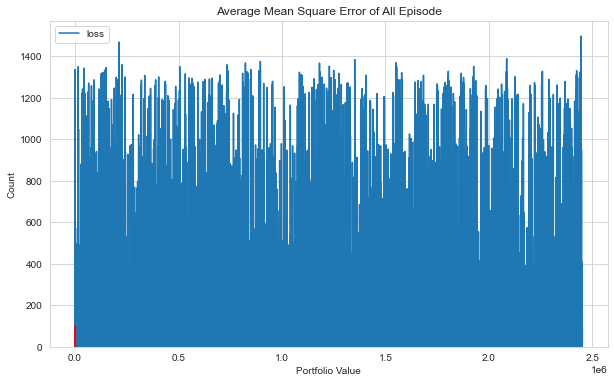

In [4]:
#train


mode = 'train'

portfolio_value = []



for e in tqdm(range(num_episodes)):
    t0 = datetime.now()
    val = play_one_episode(agent, env, mode, scaler)
    dt = datetime.now() - t0
    print(f"episode: {e + 1}/{num_episodes}, episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
    portfolio_value.append(val['portfolio_value'][-1]) 


if mode == 'train':
    # save the DQN
    agent.save(f'state_dict/{stock_name}.npz')

    # save the scaler
    with open(f'scaler/{stock_name}.pkl', 'wb') as f:
        pickle.dump(scaler, f)

    # plot losses
    loss = agent.model.losses
    losses = pd.DataFrame(loss, columns=['loss'])
    losses.plot(figsize=(10,6))
    plt.title('Average Mean Square Error of All Episode')
    plt.xlabel('Step')
    plt.ylabel('Mean Square Error')

print(f'average reward: {np.mean(portfolio_value):.2f}, min: {np.min(portfolio_value):.2f}, max: {np.max(portfolio_value):.2f}')
sns.histplot(portfolio_value, bins=100, color='r', kde=True);
plt.xlabel('Portfolio Value');
plt.ylabel('Count');

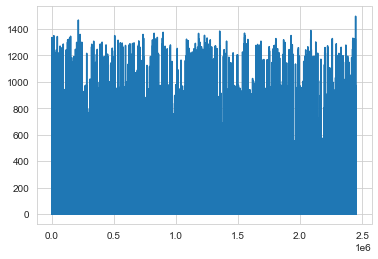

In [5]:
plt.plot(agent.model.losses)

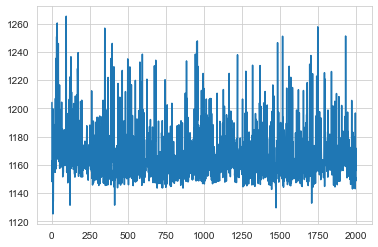

In [6]:
plt.plot(portfolio_value)

episode end value: 1180.69, duration: 0:00:00.093762
Sell: 285 times, Buy: 248 times


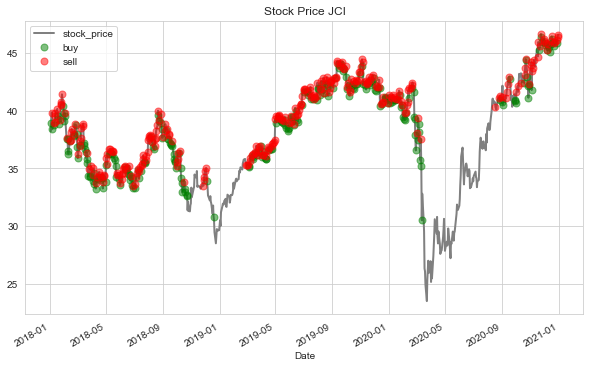

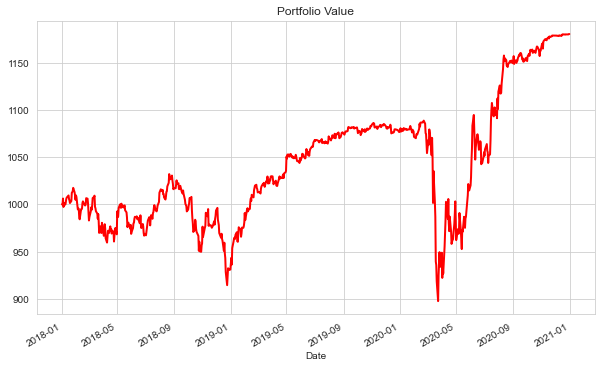

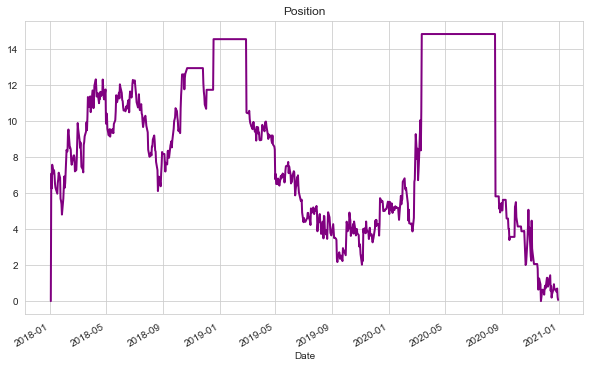

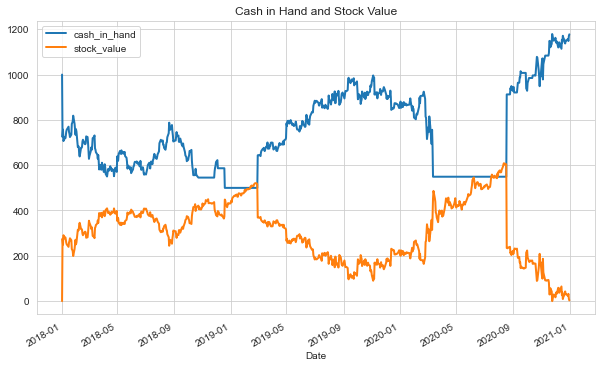

In [7]:
#test

mode = 'test'

portfolio_value = []


with open(f'scaler/{stock_name}.pkl', 'rb') as f:
    scaler = pickle.load(f)
    
env = StockEnv(test_data, capital)
agent.epsilon = 0
agent.load(f'state_dict/{stock_name}.npz')



t0 = datetime.now()
val = play_one_episode(agent, env, mode, scaler)
dt = datetime.now() - t0
print(f"episode end value: {val['portfolio_value'][-1]:.2f}, duration: {dt}")
portfolio_value.append(val['portfolio_value'][-1])
    
print(f"Sell: {env.sell_buy.count('sell')} times, Buy: {env.sell_buy.count('buy')} times")



result = pd.DataFrame(val)
result.index = test_data.index

def marker_buy(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'buy':
        return price
    else:
        return np.nan
    
def marker_sell(col):
    price = col[0] 
    sellbuy = col[1]
    
    if sellbuy == 'sell':
        return price
    else:
        return np.nan
    
result['marker_buy'] = result[['stock_price', 'sell_buy']].apply(marker_buy, axis=1);
result['marker_sell'] = result[['stock_price', 'sell_buy']].apply(marker_sell, axis=1);

result['stock_price'].plot(figsize=(10,6), c='grey', lw=2);
result['marker_buy'].plot(style='o', ms=7, label='buy', c='g', alpha=0.5);
result['marker_sell'].plot(style='o', ms=7, label='sell', c='r', alpha=0.5);
plt.title('Stock Price '+ stock_name)
plt.legend();
plt.show()



result['portfolio_value'].plot(figsize=(10,6), c='r', lw=2);
plt.title('Portfolio Value');
plt.show()

result['stock_owned'].plot(figsize=(10,6), c='purple', lw=2);
plt.title('Position')
plt.show()

result[['cash_in_hand', 'stock_value']].plot(figsize=(10,6), lw=2);
plt.title('Cash in Hand and Stock Value');
plt.show()

In [8]:


def CAGR(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    n = len(df)/252
    cagr = (df['cumulative_ret'][-1])**(1/n) - 1
    return cagr

def volatility(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    vol = df['daily_ret'].std() * np.sqrt(252)
    return vol


def sharpe(DF, rf):
    df = DF.copy()
    sr = (CAGR(df) - rf)/volatility(df)
    return sr

def max_dd(DF):
    df = DF.copy()
    try:
        df['daily_ret'] = df['portfolio_value'].pct_change()
    except:
        df['daily_ret'] = df['Adj Close'].pct_change() 
    df['cumulative_ret'] = (1 + df['daily_ret']).cumprod()
    df['cum_roll_max'] = df['cumulative_ret'].cummax()
    df['drawdown'] = df['cum_roll_max'] - df['cumulative_ret']
    df['drawdown_pct'] = df['drawdown']/df['cum_roll_max']
    max_dd = df['drawdown_pct'].max()
    return max_dd

def calmer(DF):
    df = DF.copy()
    clmr = CAGR(df)/max_dd(df)
    return clmr



print(f'Stock name: {stock_name}')
print(f'Start: {result.index[0]}  End: {result.index[-1]}')
print(f'Compound Annual Growth Rate: {CAGR(result)*100:.2f} %')
print(f'Volatility: {volatility(result):.4f}')
print(f'shape ratio: {sharpe(result, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(result)*-100:.2f} %')
print(f'Calmar ratio: {calmer(result):.4f}')
print('-----------------------------------------------------------')
print('-----------------------------------------------------------')
print('Comparing with Adj close')
print(f'Compound Annual Growth Rate (Adj close): {CAGR(test_data)*100:.2f} %')
print(f'Volatility (benchmark): {volatility(test_data):.4f}')
print(f'shape ratio: {sharpe(test_data, 0.011):.4f}')
print(f'Maximun drawdown: {max_dd(test_data)*-100:.2f} %')
print(f'Calmar ratio (benchmark): {calmer(test_data):.4f}')

Stock name: JCI
Start: 2018-01-02 00:00:00  End: 2020-12-31 00:00:00
Compound Annual Growth Rate: 5.69 %
Volatility: 0.1134
shape ratio: 0.4049
Maximun drawdown: -17.57 %
Calmar ratio: 0.3239
-----------------------------------------------------------
-----------------------------------------------------------
Comparing with Adj close
Compound Annual Growth Rate (Adj close): 6.81 %
Volatility (benchmark): 0.3067
shape ratio: 0.1863
Maximun drawdown: -47.14 %
Calmar ratio (benchmark): 0.1445


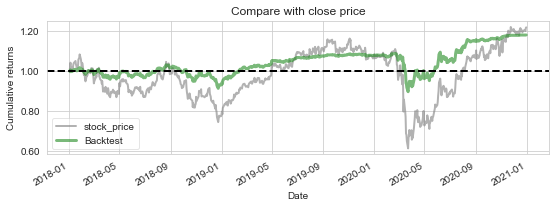

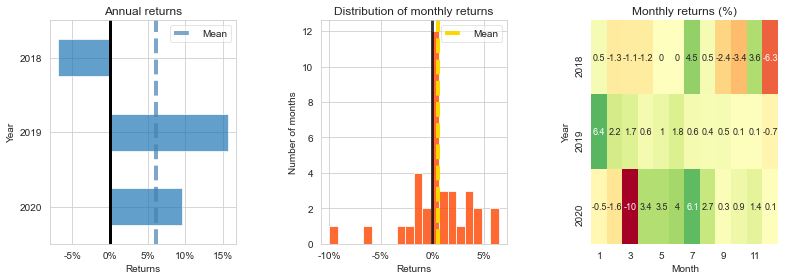

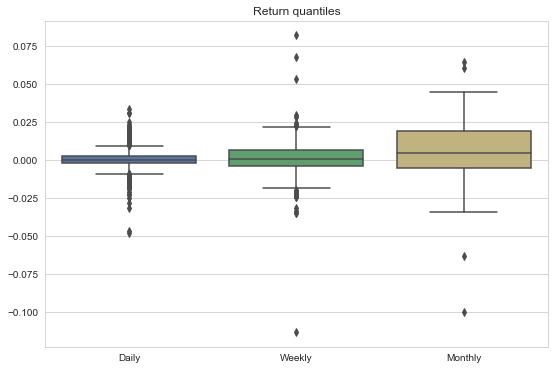

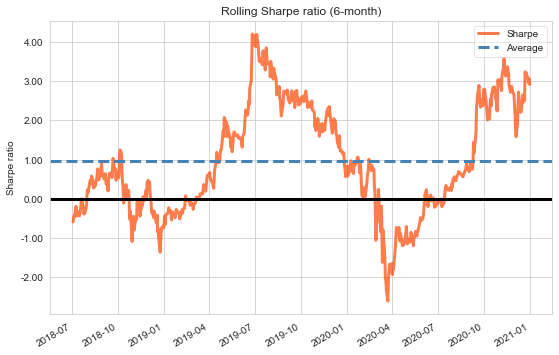

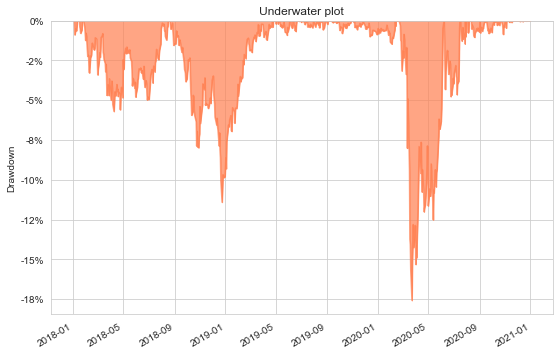

In [9]:


bt_returns = result['portfolio_value'].pct_change()
price = result['stock_price'].pct_change()



plt.figure(figsize=(9,6));
plt.subplot(2,1,1);
pf.plotting.plot_rolling_returns(bt_returns, price);
plt.title('Compare with close price');
plt.show()

fig = plt.figure(1)
plt.subplot(1,3,1)
pf.plot_annual_returns(bt_returns)
plt.subplot(1,3,2)
pf.plot_monthly_returns_dist(bt_returns)
plt.subplot(1,3,3)
pf.plot_monthly_returns_heatmap(bt_returns)
plt.tight_layout()
fig.set_size_inches(12,4)

plt.figure(figsize=(9,6))
pf.plot_return_quantiles(bt_returns);



plt.figure(figsize=(9,6))
pf.plot_rolling_sharpe(bt_returns);

plt.figure(figsize=(9,6))
pf.plot_drawdown_underwater(bt_returns);

score = (sharpe(result, 0.011) - sharpe(test_data, 0.011))*10
ret = ((result['portfolio_value'][-1] - result['portfolio_value'][0])/result['portfolio_value'][0]) * 100
with open(f'score/{stock_name}.pkl', 'wb') as f:  # Python 3: open(..., 'wb')
    pickle.dump([stock_name, industry,score, ret], f)
    
    
result.to_csv(f'../data/{stock_name}.csv')